In [1]:
from fmpy import simulate_fmu
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _createInputs(inputList,dtype):
    '''Format the input into FMPY simulate_fmu'''
    # verify length of arrays in inputList are equal
    refLength = len(inputList[0])
    for i in range(len(inputList)-1):
        if len(inputList[i+1]) != refLength:
            raise ValueError('Input arrays of inputList must be equal.')
            
    # Create formatted input per FMPy requirements
    tupleList = []
    for i in range(refLength):
        tupleItem = []
        for val in inputList:
            tupleItem.append(val[i])
        tupleList.append(tuple(tupleItem))
    return np.array(tupleList, dtype)

def simplePlotResults(results,keys):
    fig, ax = plt.subplots()
    for key in keys:
        ax.plot(results['time'],results[key], label=key)
    ax.legend()
    
def simplePlotResultsTwinned(results,keys1, keys2):
    fig, ax = plt.subplots()
    for key in keys1:
        ax.plot(results['time'],results[key], label=key)
    
    ax2 = ax.twinx()
    for key in keys2:
        ax2.plot(results['time'],results[key], '-.', label=key)
    fig.legend()

In [3]:
    # Inputs
dtype = [('time', np.double), ('Q1', np.double), ('Q2', np.double)]

time = [0,20,20,100,100,200,200,300,300,400,400,500,500,600,600,700,700,800,800,900,900,1000,1000,1100,1100]
Q1s = [0,0,80,80,80,80,20,20,20,20,70,70,70,70,50,50,50,50,100,100,100,100,0,0,0]
Q2s = [0,0,0,0,35,35,35,35,95,95,95,95,25,25,25,25,100,100,100,100,45,45,45,45,0]

inputList = [time, Q1s, Q2s]
inputs = _createInputs(inputList,dtype)

#%%
filenameFMU = 'fmus/TCLab.fmu'

# Setup
start_time = 0
stop_time = 20*60
output_interval = 2
parameters = {}
outputs = ['Q1','Q2','T1','T2']


## Create Simulated Data

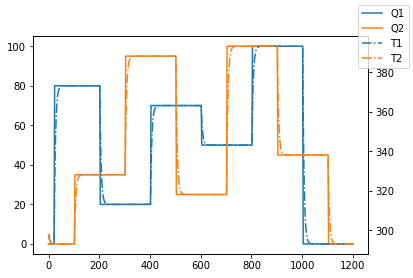

In [4]:
results = simulate_fmu(filenameFMU,
                       start_time=start_time,
                       stop_time=stop_time,
                       output_interval=output_interval,
                       output=outputs,
                       input=inputs,
                       start_values = parameters)

simplePlotResultsTwinned(results,['Q1','Q2'], ['T1','T2'])

In [5]:
# Save data in formatted csv
import pandas as pd
data = pd.DataFrame()

data['Time'] = results['time']
keys = ['Q1','Q2','T1','T2']
for key in keys:
    data[key] = results[key]
    
data.head()
data.to_csv('temp/12-tclab.csv')